# Exploring Transactions Data

Source: [IBM Synthetic Credit Card Transactions Dataset on Kaggle](https://www.kaggle.com/datasets/ealtman2019/credit-card-transactions)

In [1]:
import joblib
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: f"{x:.2f}")

In [2]:
tdf = joblib.load('data/transactions')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24386900 entries, 1876265 to 363748
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   User            int32         
 1   Card            int8          
 2   Amount          float32       
 3   Use_Chip        object        
 4   Merchant_Name   int32         
 5   Merchant_City   object        
 6   Merchant_State  object        
 7   Zip             float32       
 8   MCC             int32         
 9   Errors          object        
 10  Is_Fraud        object        
 11  Datetime        datetime64[ns]
dtypes: datetime64[ns](1), float32(2), int32(3), int8(1), object(5)
memory usage: 1.7+ GB


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-Process

In [6]:
COL_NAMES = ['User','Card','Year','Month','Day','Time','Amount','Use_Chip',
                 'Merchant_Name','Merchant_City','Merchant_State','Zip','MCC','Errors','Is_Fraud']
PARSE_DATES = ['Year', 'Month', 'Day', 'Time']

In [7]:
temp_df = pd.read_csv('data/split/part00.csv', header=None, names=COL_NAMES)

In [8]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475063 entries, 0 to 2475062
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use_Chip        object 
 8   Merchant_Name   float64
 9   Merchant_City   object 
 10  Merchant_State  object 
 11  Zip             float64
 12  MCC             float64
 13  Errors          object 
 14  Is_Fraud        object 
dtypes: float64(3), int64(5), object(7)
memory usage: 283.2+ MB


In [9]:
from src import process_data

In [10]:
process_data.combine_date_cols(columns=PARSE_DATES, result_col='Datetime', df=temp_df)
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475063 entries, 0 to 2475062
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   User            int64         
 1   Card            int64         
 2   Amount          object        
 3   Use_Chip        object        
 4   Merchant_Name   float64       
 5   Merchant_City   object        
 6   Merchant_State  object        
 7   Zip             float64       
 8   MCC             float64       
 9   Errors          object        
 10  Is_Fraud        object        
 11  Datetime        datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 226.6+ MB


In [19]:
temp_df.Amount.describe()

count     2475062
unique      44915
top        $80.00
freq        19255
Name: Amount, dtype: object

In [11]:
temp_df.sample(n=3)

,User,Card,Amount,Use_Chip,Merchant_Name,Merchant_City,Merchant_State,Zip,MCC,Errors,Is_Fraud,Datetime
89439,4,0,$42.90,Swipe Transaction,112925206871091072.00,San Francisco,CA,94117.00,5541.00,NaN,No,2009-05-20 06:52:00
133587,6,0,$24.48,Swipe Transaction,-5475680618560174080.00,Georgetown,KY,40324.00,5942.00,NaN,No,2013-08-11 06:20:00
1010178,75,1,$2.40,Swipe Transaction,-5475680618560174080.00,Fayette,AL,35555.00,5942.00,NaN,No,2008-06-15 14:19:00


In [20]:
def get_numeric_amount(df: pd.DataFrame) -> None:
    df['Amount'] = df['Amount'].apply(lambda value: float(str(value)[1:]))
    df['Amount'] = df['Amount'].astype('float32')

In [25]:
# If using -n instead -l (number of files, instead of by lines in each file) to split a file, this can create splits into partial lines
# ONLY USE -l --> updated data/split_transactions.sh to fix
temp_df.loc[temp_df['Amount'].isna()]

,User,Card,Amount,Use_Chip,Merchant_Name,Merchant_City,Merchant_State,Zip,MCC,Errors,Is_Fraud,Datetime
2475062,205,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [21]:
# To make process_data script more robust for other datasets (this one doesn't have NaN in Amounts) make sure to drop NaN as appropriate
get_numeric_amount(df=temp_df)
temp_df.info()

ValueError: could not convert string to float: 'an'

In [5]:

tdf = process_data.save_space(tdf)

In [6]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439999 entries, 0 to 2439998
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   User            int32         
 1   Card            int32         
 2   Amount          float32       
 3   Use_Chip        object        
 4   Merchant_Name   int32         
 5   Merchant_City   object        
 6   Merchant_State  object        
 7   Zip             float32       
 8   MCC             int32         
 9   Errors          object        
 10  Is_Fraud        object        
 11  Datetime        datetime64[ns]
dtypes: datetime64[ns](1), float32(2), int32(4), object(5)
memory usage: 167.5+ MB


In [7]:
tdf.head(3)

,User,Card,Amount,Use_Chip,Merchant_Name,Merchant_City,Merchant_State,Zip,MCC,Errors,Is_Fraud,Datetime
0,0,0,134.09,Swipe,1719741273,La Verne,CA,91750.00,5300,NaN,No,2002-09-01 06:21:00
1,0,0,38.48,Swipe,1102623989,Monterey Park,CA,91754.00,5411,NaN,No,2002-09-01 06:42:00
2,0,0,120.34,Swipe,1102623989,Monterey Park,CA,91754.00,5411,NaN,No,2002-09-02 06:22:00


In [8]:
# tdf['User'] = tdf['User'].astype(np.int8) # There are 2000 simulated customers, so reverted these back to int32
tdf['Card'] = tdf['Card'].astype(np.int8)
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439999 entries, 0 to 2439998
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   User            int8          
 1   Card            int8          
 2   Amount          float32       
 3   Use_Chip        object        
 4   Merchant_Name   int32         
 5   Merchant_City   object        
 6   Merchant_State  object        
 7   Zip             float32       
 8   MCC             int32         
 9   Errors          object        
 10  Is_Fraud        object        
 11  Datetime        datetime64[ns]
dtypes: datetime64[ns](1), float32(2), int32(2), int8(2), object(5)
memory usage: 153.6+ MB


In [10]:
tdf['Amount'] = tdf['Amount'].apply(lambda value: float(value[1:]))
tdf['Amount'] = tdf['Amount'].astype('float32')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int32  
 1   Card            int32  
 2   Year            int32  
 3   Month           int32  
 4   Day             int32  
 5   Time            object 
 6   Amount          float32
 7   Use Chip        object 
 8   Merchant City   object 
 9   Merchant State  object 
 10  Zip             float32
 11  MCC             int32  
 12  Errors?         object 
 13  Is Fraud?       object 
dtypes: float32(2), int32(6), object(6)
memory usage: 1.8+ GB


In [11]:
tdf['Use Chip'].value_counts()

Use Chip
Swipe Transaction     15386082
Chip Transaction       6287598
Online Transaction     2713220
Name: count, dtype: int64

In [11]:
tdf['Use Chip'] = tdf['Use Chip'].apply(lambda word: word.split()[0])
tdf['Use Chip'].value_counts()

Use Chip
Swipe     15386082
Chip       6287598
Online     2713220
Name: count, dtype: int64

In [13]:
tdf.info()
joblib.dump(tdf, 'data/slimmed_before_datetime_combine')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int32  
 1   Card            int32  
 2   Year            int32  
 3   Month           int32  
 4   Day             int32  
 5   Time            object 
 6   Amount          float32
 7   Use Chip        object 
 8   Merchant City   object 
 9   Merchant State  object 
 10  Zip             float32
 11  MCC             int32  
 12  Errors?         object 
 13  Is Fraud?       object 
dtypes: float32(2), int32(6), object(6)
memory usage: 1.8+ GB


['data/slimmed_before_datetime_combine']

In [4]:
tdf['Is_Fraud'].value_counts()

Is_Fraud
No     24357143
Yes       29757
Name: count, dtype: int64

In [4]:
tdf['Is_Fraud'] = tdf['Is_Fraud'].apply(lambda word: True if word.lower() == 'yes' else False)
tdf.sample(n=3)

,User,Card,Amount,Use_Chip,Merchant_Name,Merchant_City,Merchant_State,Zip,MCC,Errors,Is_Fraud,Datetime
516681,462,3,1.65,Swipe,-1952011645,Derby,KS,67037.00,5812,NaN,False,2014-01-19 07:59:00
609455,675,0,13.54,Chip,479254457,Shepherdsville,KY,40165.00,5310,NaN,False,2019-02-20 16:44:00
1843840,1745,0,36.33,Online,-2021769076,ONLINE,NaN,NaN,4784,NaN,False,2013-12-04 14:41:00


### Combine partial dataframes

In [10]:
import os

In [11]:
dir = 'data/slim'
parts = [f for f in os.listdir(dir)]
dfs = []
for part in parts:
    dfs.append(joblib.load(os.path.join(dir, part)))
tdf = pd.concat(dfs)
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24386900 entries, 0 to 2439999
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   User            int8          
 1   Card            int8          
 2   Amount          float32       
 3   Use_Chip        object        
 4   Merchant_Name   int32         
 5   Merchant_City   object        
 6   Merchant_State  object        
 7   Zip             float32       
 8   MCC             int32         
 9   Errors          object        
 10  Is_Fraud        object        
 11  Datetime        datetime64[ns]
dtypes: datetime64[ns](1), float32(2), int32(2), int8(2), object(5)
memory usage: 1.7+ GB


In [12]:
joblib.dump(tdf, 'data/transactions')

['data/transactions']

# Visuals

In [3]:
tdf.describe()

,User,Card,Amount,Merchant_Name,Zip,MCC,Datetime
count,24386900.00,24386900.00,24386900.00,24386900.00,21508765.00,24386900.00,24386900
mean,1001.02,1.35,43.63,-5431366.16,50956.41,5561.17,2012-06-15 16:57:04.016494592
min,0.00,0.00,-500.00,-2147477762.00,501.00,1711.00,1991-01-02 07:10:00
25%,510.00,0.00,9.20,-1109575129.00,28374.00,5300.00,2008-12-25 11:34:00
50%,1006.00,1.00,30.14,11876726.00,46742.00,5499.00,2013-01-11 08:49:00
75%,1477.00,2.00,65.06,1063776993.00,77564.00,5812.00,2016-08-27 19:46:00
max,1999.00,8.00,12390.50,2147427927.00,99928.00,9402.00,2020-02-28 23:58:00
std,569.46,1.41,78.71,1311018995.45,29141.96,879.32,NaN


In [9]:
fdf = tdf.loc[tdf['Is_Fraud']].copy()

In [11]:
df = tdf.loc[~tdf['Is_Fraud']].copy()

In [10]:
fdf.describe()

,User,Card,Amount,Merchant_Name,Zip,MCC,Datetime
count,29757.00,29757.00,29757.00,29757.00,4905.00,29757.00,29757
mean,1011.04,1.62,108.59,35311146.87,52427.47,5252.21,2012-06-22 08:57:49.500957952
min,0.00,0.00,-500.00,-2144772375.00,1057.00,3000.00,1996-07-05 11:11:00
25%,545.00,0.00,18.36,-1002789084.00,32503.00,4829.00,2008-09-29 16:26:00
50%,1020.00,1.00,71.02,38861438.00,44824.00,5311.00,2012-08-03 13:10:00
75%,1487.00,3.00,150.13,1102623989.00,78374.00,5719.00,2016-03-24 14:08:00
max,1997.00,8.00,5694.44,2145070271.00,99504.00,9402.00,2019-10-27 14:54:00
std,559.30,1.52,201.17,1269481372.82,28360.63,989.61,NaN


In [12]:
df.describe()

,User,Card,Amount,Merchant_Name,Zip,MCC,Datetime
count,24357143.00,24357143.00,24357143.00,24357143.00,21503860.00,24357143.00,24357143
mean,1001.01,1.35,43.55,-5481141.09,50956.11,5561.55,2012-06-15 16:45:20.264605184
min,0.00,0.00,-500.00,-2147477762.00,501.00,1711.00,1991-01-02 07:10:00
25%,510.00,0.00,9.20,-1109575129.00,28374.00,5300.00,2008-12-25 16:25:00
50%,1006.00,1.00,30.11,11876726.00,46742.00,5499.00,2013-01-11 09:07:00
75%,1477.00,2.00,65.00,1063776993.00,77564.00,5812.00,2016-08-28 08:02:00
max,1999.00,8.00,12390.50,2147427927.00,99928.00,9402.00,2020-02-28 23:58:00
std,569.47,1.41,78.43,1311068187.80,29142.59,879.11,NaN


In [15]:
fdf['MCC'].value_counts().head(10)

MCC
5311    4824
5300    2201
5310    2152
4829    1607
5912    1057
5411     943
5815     879
5651     849
5732     843
5719     717
Name: count, dtype: int64

In [16]:
df['MCC'].value_counts().head(10)

MCC
5411    2859795
5499    2680349
5541    2638628
5812    1797593
5912    1406579
4829    1127454
4784    1124291
5300    1120836
4121     980965
7538     914579
Name: count, dtype: int64

In [17]:
del tdf

In [18]:
joblib.dump(fdf, 'data/fraud_only')

['data/fraud_only']

In [19]:
joblib.dump(df, 'data/no_fraud')

['data/no_fraud']

In [16]:
sns.set(rc={'figure.figsize': (2, 8)})

/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


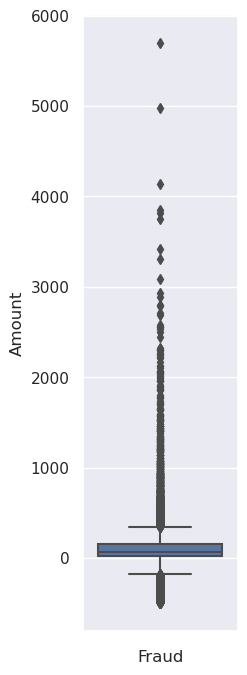

In [17]:
sns.boxplot(y=fdf['Amount'])
plt.xlabel('Fraud')
plt.show()

/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


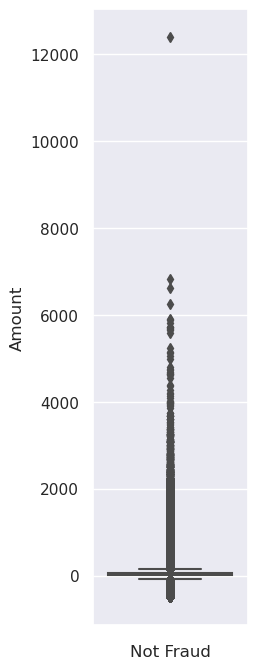

In [18]:
sns.boxplot(y=df['Amount'])
plt.xlabel('Not Fraud')
plt.show()

In [24]:
sns.set(rc={'figure.figsize': (8, 5)})

/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


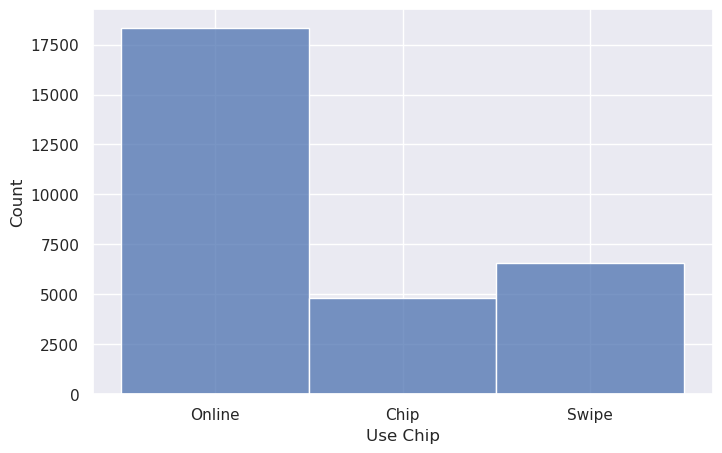

In [25]:
sns.histplot(data=fdf['Use Chip'])
plt.show()

/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


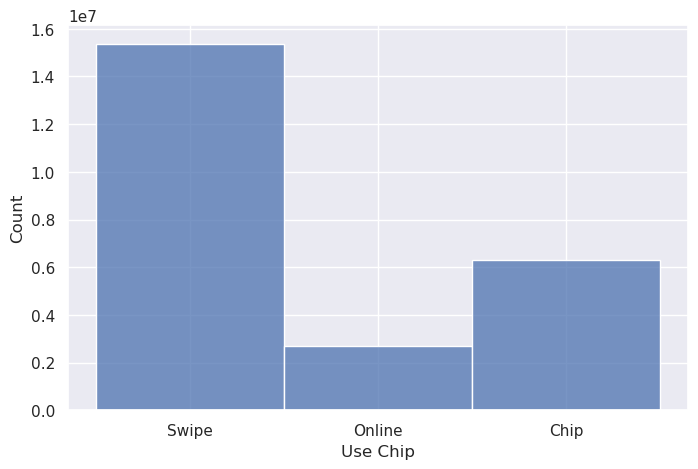

In [26]:
sns.histplot(data=df['Use Chip'])
plt.show()

In [21]:
fdf.head(2)

,User,Card,Amount,Use_Chip,Merchant_Name,Merchant_City,Merchant_State,Zip,MCC,Errors,Is_Fraud,Datetime
451317,1236,1,171.74,Swipe,440050626,Jacksonville,FL,32218.00,5732,NaN,True,1996-07-05 11:11:00
451318,1236,1,119.30,Swipe,2081821369,Titusville,FL,32796.00,5816,NaN,True,1996-07-05 12:53:00


/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


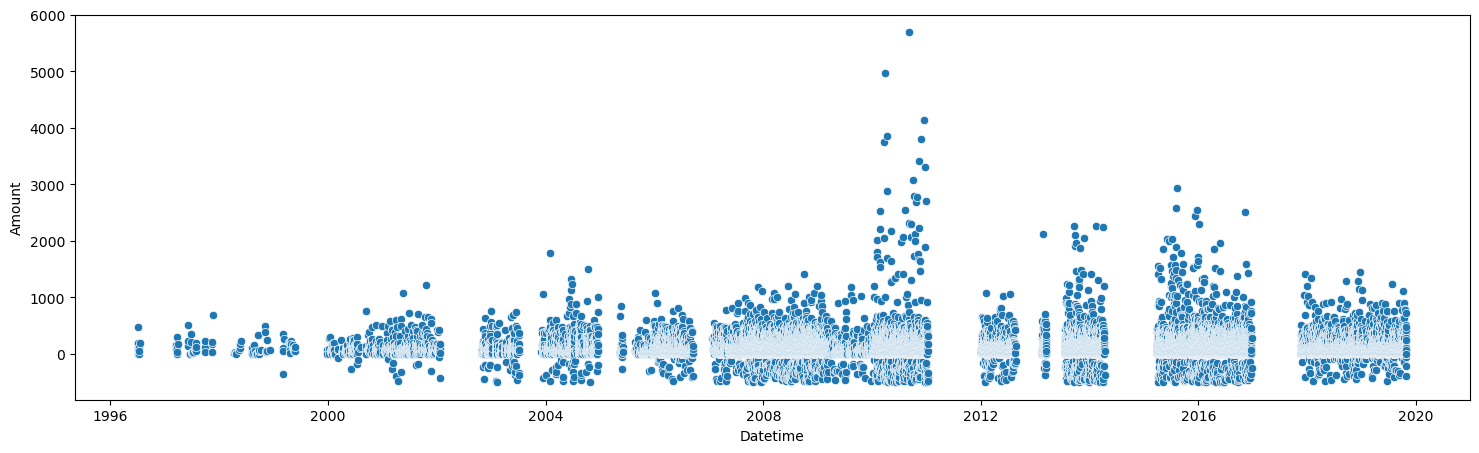

In [26]:
plt.figure(figsize=(18,5))
sns.scatterplot(x=fdf['Datetime'], y=fdf['Amount'])
plt.show()

In [27]:
fdf.loc[(fdf['Datetime'] >= '2011-01-01') & (fdf['Datetime'] < '2012-01-01')].describe()

,User,Card,Amount,Merchant_Name,Zip,MCC,Datetime
count,55.00,55.00,55.00,55.00,0.00,55.00,55
mean,804.73,0.93,113.00,-10509528.78,NaN,4993.95,2011-01-04 12:45:04.363636480
min,148.00,0.00,-490.00,-2113554858.00,NaN,3008.00,2011-01-01 04:23:00
25%,473.00,0.00,43.66,-997347869.50,NaN,4421.50,2011-01-03 10:04:00
50%,848.00,1.00,99.89,38861438.00,NaN,5300.00,2011-01-04 06:03:00
75%,1122.00,2.00,232.20,907190995.00,NaN,5719.00,2011-01-04 13:15:30
max,1739.00,2.00,920.47,2080935213.00,NaN,7011.00,2011-01-12 09:37:00
std,528.65,0.92,258.05,1172076135.68,NaN,928.38,NaN
